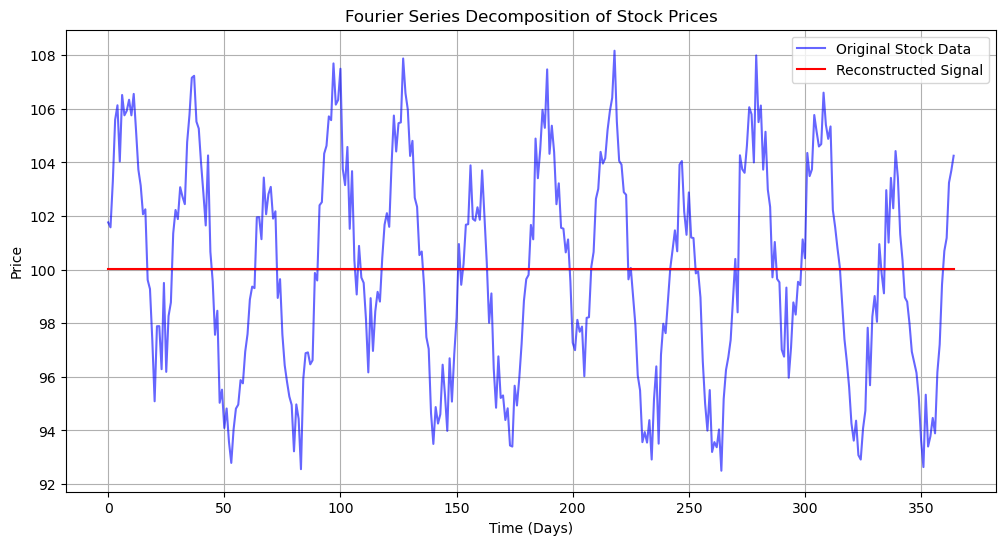

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft

# Step 1: Create Synthetic Stock Data
np.random.seed(0)
days = 365  # Number of days (e.g., 1 year of daily data)
time = np.arange(0, days)

# Simulated price data with cyclical patterns
price_data = 100 + 5 * np.sin(2 * np.pi * time / 30)  # Monthly cycle (30 days)
price_data += 2 * np.sin(2 * np.pi * time / 90)  # Quarterly cycle (90 days)
price_data += np.random.normal(0, 1, days)  # Add some random noise

# Step 2: Apply Fourier Transform
price_fft = fft(price_data)  # Fourier Transform
frequencies = fftfreq(days)  # Frequency components

# Step 3: Filter significant frequencies (frequency components with high amplitude)
amplitude = np.abs(price_fft)
threshold = amplitude.max() * 0.3  # Filter threshold (30% of max amplitude)
significant_freqs = frequencies[amplitude > threshold]
significant_amplitudes = price_fft[amplitude > threshold]

# Step 4: Inverse Fourier Transform to reconstruct signal from significant frequencies
filtered_fft = np.where(amplitude > threshold, price_fft, 0)  # Retain significant frequencies only
reconstructed_signal = ifft(filtered_fft).real

# Plot the Original vs. Reconstructed Data
plt.figure(figsize=(12, 6))
plt.plot(time, price_data, label='Original Stock Data', color='blue', alpha=0.6)
plt.plot(time, reconstructed_signal, label='Reconstructed Signal', color='red', linewidth=1.5)
plt.title("Fourier Series Decomposition of Stock Prices")
plt.xlabel("Time (Days)")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

Expected Return (Mean): 0.08
Variance: 0.04000000000000001
Probability of experiencing returns below -10.0%: 0.18406012534675953


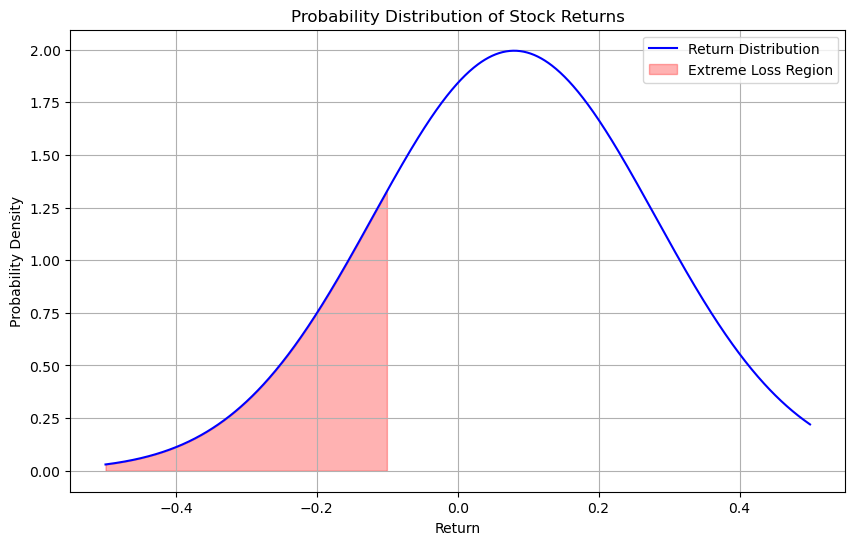

In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Step 1: Define parameters for a stock's return distribution
mu = 0.08  # Expected annual return (8%)
sigma = 0.2  # Annual volatility (20%)

# Step 2: Define the Moment Generating Function (MGF) for a normal distribution
def mgf_normal(t, mu, sigma):
    return np.exp(mu * t + 0.5 * sigma**2 * t**2)

# Step 3: Calculate the first moment (Mean) and second moment (Variance)
# Mean = derivative of MGF at t=0
mean = mu

# Variance = second derivative of MGF at t=0 - (first derivative)^2
variance = sigma**2

print("Expected Return (Mean):", mean)
print("Variance:", variance)

# Step 4: Use the MGF to analyze probabilities of extreme events
# Calculate the probability of returns falling below a certain threshold (e.g., -0.1 or -10%)
threshold_return = -0.1
z_score = (threshold_return - mean) / sigma
prob_extreme_loss = norm.cdf(z_score)

print(f"Probability of experiencing returns below {threshold_return*100}%:", prob_extreme_loss)

# Step 5: Visualize the probability distribution and highlight the extreme loss area
returns = np.linspace(-0.5, 0.5, 1000)  # Range of returns from -50% to 50%
pdf = norm.pdf(returns, mean, sigma)  # Probability density function

plt.figure(figsize=(10, 6))
plt.plot(returns, pdf, label="Return Distribution", color="blue")
plt.fill_between(returns, pdf, where=(returns <= threshold_return), color="red", alpha=0.3, label="Extreme Loss Region")
plt.title("Probability Distribution of Stock Returns")
plt.xlabel("Return")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()